In [22]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 2. Load the Dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# 3. Explore the Data
print(df.info())
print(df['Attrition'].value_counts())
print(df['JobRole'].value_counts())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

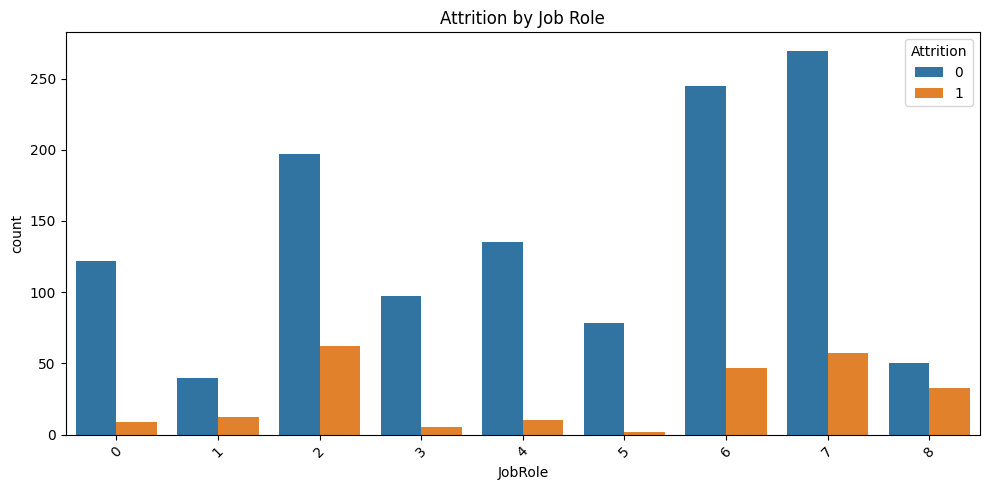

In [23]:
# 4. Clean & Preprocess

# Drop unnecessary columns
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# 5. EDA Visualization
plt.figure(figsize=(10,5))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# 7. Model Training

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost (suppressing label encoder warning)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# 8. Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n----- {model_name} -----")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


----- Logistic Regression -----
Confusion Matrix:
 [[181  69]
 [ 50 194]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       250
           1       0.74      0.80      0.77       244

    accuracy                           0.76       494
   macro avg       0.76      0.76      0.76       494
weighted avg       0.76      0.76      0.76       494


----- Random Forest -----
Confusion Matrix:
 [[241   9]
 [ 24 220]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       250
           1       0.96      0.90      0.93       244

    accuracy                           0.93       494
   macro avg       0.94      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


----- XGBoost -----
Confusion Matrix:
 [[238  12]
 [ 29 215]]
Classification Report:
               precision    recall  f1-score   support

           0

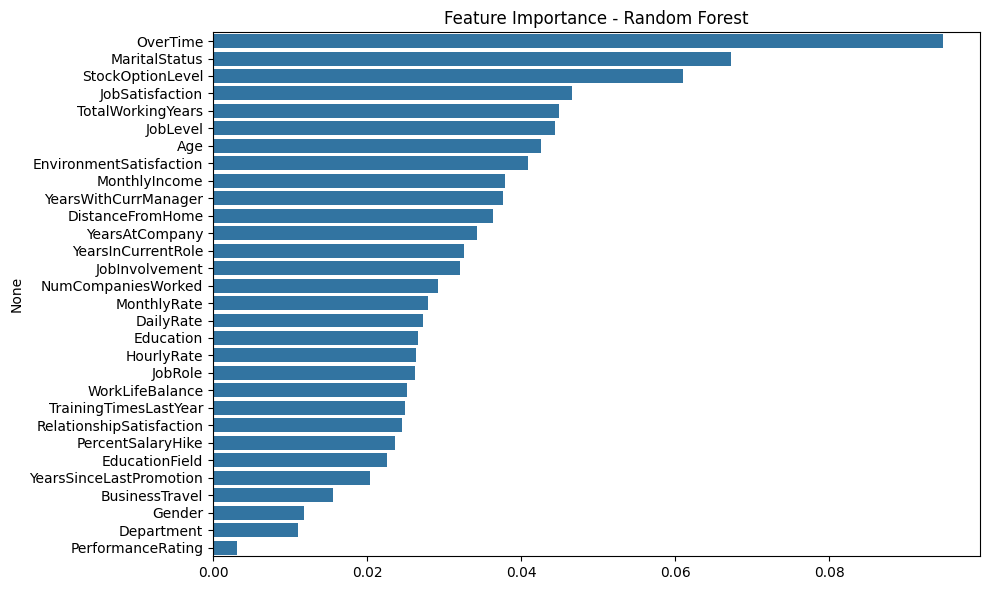

In [26]:
# 9. Feature Importance from Random Forest
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


